## MLR With PCA

##  Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
df = pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## EDA

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
print('bmi mean and median')
print(df['bmi'].mean())
print(df['bmi'].median())
print('children mean and median')
print(df['children'].mean())
print(df['children'].median())

bmi mean and median
30.663396860986538
30.4
children mean and median
1.0949177877429
1.0


## Data Preprocessing

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Encoding Catogorical Data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,4,5])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


## Feature Scalling

In [10]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x)

## PCA on X

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x=pca.fit_transform(x)
p_var = pca.explained_variance_ratio_
np.set_printoptions(suppress = True)
print(p_var)

[0.19774273 0.16876007 0.14016547 0.12025262 0.12007904 0.09683779
 0.08741064 0.06875166 0.         0.         0.        ]


In [12]:
print(x)

[[ 0.88105705  2.8175999  -0.75317391 ...  0.          0.
  -0.        ]
 [ 0.82113249 -1.30845864  1.63114951 ...  0.          0.
  -0.        ]
 [ 0.81408993 -1.34196252  1.61331106 ...  0.          0.
   0.        ]
 ...
 [-1.07826824  0.75390532  2.09189278 ... -0.          0.
  -0.        ]
 [-1.63890056  0.45477051 -0.3789003  ...  0.          0.
  -0.        ]
 [ 0.75432539  2.83206643 -1.06794547 ... -0.          0.
   0.        ]]


## Splitting my new/converted x into train and test set with y

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =  0)

## Creating and training MLR Model

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting Output

In [15]:
y_pred = reg.predict(x_test)
print(y_pred)

[10933.21155574  9512.8324222  38041.00735423 16059.70747837
  7043.26662832  4349.4621617   1706.96089314 14394.9866559
  9085.13383969  7441.23270909  4753.54351794 10369.33593657
  8771.74696202  3854.89414984 27866.12905137 10795.13733379
 11222.20370673  6402.54306789  8169.85904197 27238.52624793
 33660.35315478 14368.65736049 11815.63515575 32077.7665422
  4003.45667548  9503.66481982  1300.46469949  9837.21769176
  2389.79352434 10347.61770378  9096.75180841 39868.82628106
 15358.46023134 13550.74027288 24855.19893545  5276.55018597
 12440.11574858 30419.10088152 33404.70107196  3589.68879908
  4165.42520027  3877.84666845 30662.94401638 39399.93810208
 27664.45672924  5121.40138303 10687.54898832  7766.0519324
  3783.30427905 10291.43815512  5762.41813766  3523.62029994
 32752.25253587 38465.32482978 15932.64434683  7411.84850381
  5555.75121968  9367.71451915  8929.17757486 11680.21915621
  1617.74743309 38890.07260956 14798.67809333 11568.7037043
 14377.61919109 13930.295372

## Calculating MSE,RMES and R_2 Score 

In [16]:
import sklearn.metrics as met
mse=met.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=met.r2_score(y_test,y_pred)
print('mean squared error:',mse)
print('root mean squared error:',rmse)
print('r2_score:',r2)

mean squared error: 34615842.99772153
root mean squared error: 5883.5230090245705
r2_score: 0.8214789693900787


## Visualisation of Output
Plotting Actual vs Predicted values

Text(0, 0.5, 'y_pred')

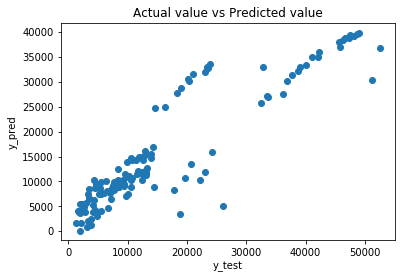

In [17]:
plt.scatter(y_test,y_pred)
plt.title("Actual value vs Predicted value")
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Plotting Significant feature vs Predicted output
Significant feature is the column with highest Eigen value λ

Text(0, 0.5, 'y_pred')

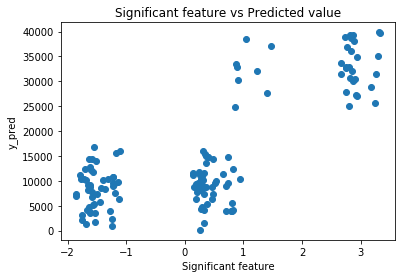

In [18]:
plt.scatter(x_test[:,0],y_pred)
plt.title("Significant feature vs Predicted value")
plt.xlabel("Significant feature")
plt.ylabel("y_pred")

<IPython.core.display.Javascript object>


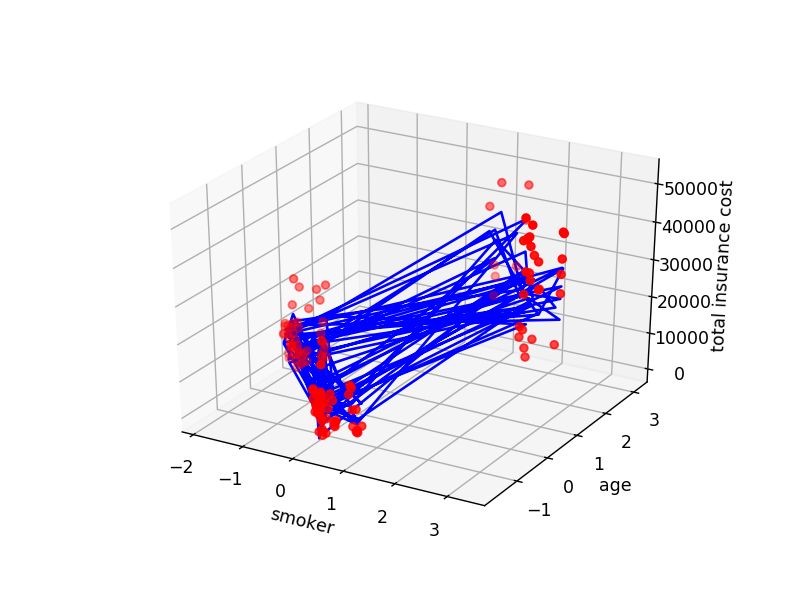

Text(0.5, 0, 'total insurance cost')

In [19]:
%matplotlib notebook
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c ='red')
ax.plot3D(x_test[:,0],x_test[:,1],y_pred,c ='blue')
ax.set_xlabel('smoker')
ax.set_ylabel('age')
ax.set_zlabel('total insurance cost')